# Ejercicio 12: ensamble microcanonico

Hay un sistema constituido por $N$ partículas, cada una puede estar en dos niveles de energía distintos (no degenerados) de valor $\epsilon_0$ y $\epsilon_1$ ($\epsilon_1 > \epsilon_0$). Si llamamos $n_0$ al número de partículas en el estado $\epsilon_0$ y a $n_1$ al número de partículas en el estado $\epsilon_1$, se tienen las siguientes restricciones para la energía total y el número total de partículas:

$ E = n_0\epsilon_0 + n_1\epsilon_1 $

$ N = n_0 + n_1 \quad (6.36) $

**(a) Muestre que el número de configuraciones posibles (microestados) está dado por:**

$ \Omega(N, n_0) = \frac{N!}{n_0!n_1!} \quad (6.37) $

**(b) Usando la ecuación de entropía $S(N, n_0) = k_B \ln(\Omega)$ y la fórmula de Stirling $\ln(N!) \approx N \ln(N) - N$, muestre que la entropía es aproximadamente igual a:**

$ S(N, n_0, n_1) = k_B \left[ N \ln(N) - \sum_{i=0}^{1} n_i \ln(n_i) \right] \quad (6.38) $

**(c) Si definimos la fracción $x = \frac{n_1}{N}$ de partículas que se encuentran en el nivel de energía $\epsilon_1$, muestre que la entropía toma la forma:**

$ S(N, x) = -k_B N \left[ x \ln(x) + (1 - x) \ln(1 - x) \right] \quad (6.39) $

donde $x = \frac{1}{N (\epsilon_1 - \epsilon_0)} (E - N \epsilon_0)$.

**(d) Dibuje la entropía $\frac{S(N, x)}{k_B N}$ como función de $x$.**

**(e) De la primera ley de la termodinámica tenemos:**

$ \frac{1}{T} = \left( \frac{\partial S}{\partial E} \right)_N = \left( \frac{\partial S}{\partial x} \right)_N \left( \frac{\partial x}{\partial E} \right)_N \quad (6.40) $

muestre que la proporción de partículas como función de la temperatura está dada por:

$ x(T) = \frac{1}{1 + e^{-\Delta E/k_B T}}, \quad \Delta E = \epsilon_1 - \epsilon_0 \quad (6.41) $

**(f) Para bajas y altas temperaturas, $T \rightarrow 0$ y $T \rightarrow \infty$, encuentre $x(T)$. Muestre que la entropía a altas temperaturas vale:**

$ \lim_{{T \rightarrow \infty}} S(T) = k_B N \ln(2) \quad (6.42) $

**(g) Un gas ideal conformado por $N$ partículas realiza una expansión isotérmica de un volumen $V_1 = V$ a un volumen $V_2 = 2V$. Calcule el cambio de entropía y compare con el resultado anterior. ¿Cómo se relacionan?**


# Solucion

In [6]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [7]:
import warnings

warnings.filterwarnings('ignore')

## a)

Número de configuraciones posibles (microestados):
El número de configuraciones posibles (microestados) está dado por el coeficiente binomial:
$
\Omega(N, n0) = \frac{N!}{n0!(N - n0)!}
$
donde $N$ es el número total de partículas y $n0$ es el número de partículas en el estado $e0$.

Y dado que N = n0 + n1, entonces:
$
\Omega(N, n0) = \frac{N!}{n0!n1!}
$

## b)

Utilizando la definición de entropía $S(N, n_0) = k_B \ln(\Omega)$, podemos sustituir $\Omega(N, n_0)$ de la ecuación (a) para obtener:

$
S(N, n_0) = k_B \ln(N!) - \ln(n_0!) - \ln((N - n_0)!)
$

Ahora, podemos utilizar la fórmula de Stirling $\ln(N!) \approx N \ln(N) - N$ y aplicarla a la ecuación anterior:

$
S(N, n_0) = k_B (N \ln(N) - N - n_0 \ln(n_0) + n_0 - (N - n_0) \ln(N - n_0) + (N - n_0))
$

Simplificando aún más:

$
S(N, n_0) = k_B (N \ln(N) - n_0 \ln(n_0) - (N - n_0) \ln(N - n_0))
$

$
S(N, n_0) = k_B (N \ln(N) - \Sigma_{i=0}^{1} n_i \ln(n_i))
$

## c)

Para expresar la entropía en función de la fracción $x = \frac{{n_1}}{{N}}$, sustituimos $n_0 = N - n_1$ en la ecuación de entropía derivada en (b):

$
S(N, x) = k_B (N \ln(N) - (N - Nx) \ln(N - Nx) - (Nx) \ln(Nx))
$

Simplificando aún más:

$
S(N, x) = -k_B N [x \ln(x) + (1 - x) \ln(1 - x)]
$

donde $x = \frac{{n_1}}{{N}}$.

## d)

In [ ]:
def calculate_entropy_x(N, x):
    kb = 1.38e-23
    entropy = -N * kb * (x * np.log(x) + (1 - x) * np.log(1 - x))
    return entropy

In [9]:
def plot_entropy(N):
    x = np.linspace(0, 1, 100)
    entropy = [calculate_entropy_x(N, xi) for xi in x]
    normalized_entropy = entropy / (N * np.log(2))
    plt.plot(x, normalized_entropy)
    plt.xlabel('x')
    plt.ylabel('S(N, x) / (kB N)')
    plt.title('Entropy as a Function of x')
    plt.show()



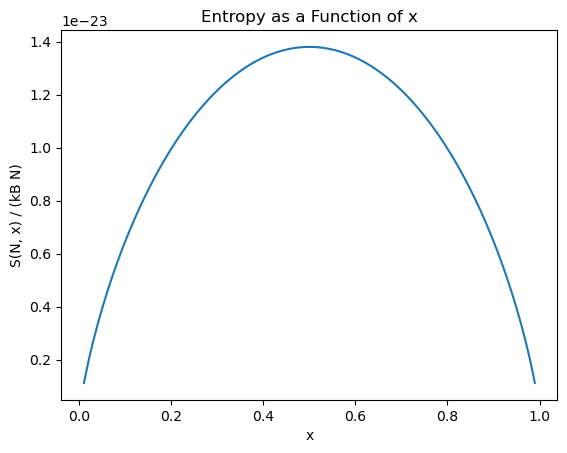

In [11]:
N = 100

plot_entropy(N)


## e)

La proporción de partículas en función de la temperatura se puede derivar a partir de la definición de temperatura como la derivada de la entropía con respecto a la energía $\left(\frac{\partial S}{\partial E}\right)_N$. Utilizando la regla de la cadena, tenemos:

$\frac{1}{T} = \left(\frac{\partial S}{\partial E}\right)_N = \left(\frac{\partial S}{\partial x}\right)_N \cdot \left(\frac{\partial x}{\partial E}\right)_N$

Para calcular $\left(\frac{\partial S}{\partial x}\right)_N$, diferenciamos la ecuación de entropía de la parte (c) con respecto a $x$:

$\left(\frac{\partial S}{\partial x}\right)_N = -k_B N \left[\ln(x) - \ln(1 - x)\right]$

Para calcular $\left(\frac{\partial x}{\partial E}\right)_N$, expresamos $x$ como una función de $E$:

$x = \frac{1}{N(e_1 - e_0)(E - N e_0)}$

Tomando la derivada de $x$ con respecto a $E$, tenemos:

$\left(\frac{\partial x}{\partial E}\right)_N = -\frac{1}{N(e_1 - e_0)(E - N e_0)^2}$

Multiplicando $\left(\frac{\partial S}{\partial x}\right)_N$ y $\left(\frac{\partial x}{\partial E}\right)_N$ juntos, podemos simplificar la expresión para $x(T)$:

$\frac{1}{T} = \frac{-k_B N \left[\ln(x) - \ln(1 - x)\right]}{N(e_1 - e_0)(E - N e_0)^2}$

Ahora, vamos a simplificar esta ecuación paso a paso:

Reorganizar la ecuación multiplicando ambos lados por $T$ para aislar los términos logarítmicos:

$-k_B N \left(\ln(x) - \ln(1 - x)\right) = \frac{-T}{N(e_1 - e_0)(E - N e_0)^2}$

Combinar los términos logarítmicos en el lado izquierdo utilizando la propiedad $\ln(a) - \ln(b) = \ln\left(\frac{a}{b}\right)$:

$\ln\left(\frac{x}{1 - x}\right) = \frac{e_1 - e_0}{k_B T}$

Exponenciar ambos lados de la ecuación utilizando $e^{\ln(a)} = a$:

$\frac{x}{1 - x} = e^{\frac{e_1 - e_0}{k_B T}}$

Multiplicar ambos lados por $(1 - x)$:

$x = (1 - x) \cdot e^{\frac{e_1 - e_0}{k_B T}}$

Simplificar el lado derecho:

$x = e^{\frac{e_1 - e_0}{k_B T}} - x \cdot e^{\frac{e_1 - e_0}{k_B T}}$

Reorganizar la ecuación aislando $x$ en un lado:

$x(1 + e^{\frac{e_1 - e_0}{k_B T}}) = e^{\frac{e_1 - e_0}{k_B T}}$

Dividir ambos lados por $(1 + e^{\frac{e_1 - e_0}{k_B T}})$:

$x = \frac{e^{\frac{e_1 - e_0}{k_B T}}}{1 + e^{\frac{e_1 - e_0}{k_B T}}}$

Finalmente, tenemos la expresión simplificada para $x(T)$:

$x(T) = \frac{1}{1 + e^{-\frac{\Delta E}{k_B T}}}$

donde $\Delta E = e_1 - e_0$ y $k_B$ es la constante de Boltzmann.

## f)

En temperaturas altas, a medida que $T$ se acerca a $\infty$, podemos reescribir la expresión para $x(T)$ de la siguiente manera:

$$
x(T) = \frac{1}{1 + e^{-\frac{\Delta E}{k_B T}}} \approx \frac{1}{1 + e^{0}} = \frac{1}{1 + 1} = \frac{1}{2}
$$

Por lo tanto, en temperaturas altas, $x(T)$ tiende a $\frac{1}{2}$.

Ahora evaluemos la entropía en temperaturas altas:

$$
\lim_{{T \to \infty}} S(N, x) = -k_B N \left[x \ln(x) + (1 - x) \ln(1 - x)\right] = -k_B N \left[\frac{1}{2} \ln\left(\frac{1}{2}\right) + \left(1 - \frac{1}{2}\right) \ln\left(1 - \frac{1}{2}\right)\right] = -k_B N \ln(2)
$$

Por lo tanto, la entropía en temperaturas altas tiende a $-k_B N \ln(2)$.
